# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download from Atlas and Load Data

In [3]:
from dpet.ensemble import Ensemble


ensembles = [
    Ensemble("PED00156e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00156e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00156e001.top.pdb'),
    Ensemble("PED00157e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.top.pdb'),
    Ensemble("PED00158e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.top.pdb')
]
data_dir = 'C:/Users/nikol/Documents/test_dir/testington'

analysis = EnsembleAnalysis(ensembles, data_dir)
analysis.load_trajectories()

Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


{'PED00156e001': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x2d66a647f10>,
 'PED00157e001': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x2d66a85bdc0>,
 'PED00158e001': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x2d66a86fe50>}

In [4]:
analysis.random_sample_trajectories(sample_size=50)

50 conformations sampled from PED00156e001 trajectory.
50 conformations sampled from PED00157e001 trajectory.
50 conformations sampled from PED00158e001 trajectory.


{'PED00156e001': <mdtraj.Trajectory with 50 frames, 941 atoms, 59 residues, without unitcells at 0x2d65cb84c10>,
 'PED00157e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x2d66a86f580>,
 'PED00158e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x2d6607f3970>}

## Featurization

In [5]:
analysis.extract_features(featurization='ca_dist')

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (50, 1653)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (50, 1653)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (50, 1653)
Feature names: ['MET1-ALA3', 'MET1-ILE4', 'MET1-ALA5', 'MET1-LYS6', 'MET1-HIS7', 'MET1-ASP8', 'MET1-PHE9', 'MET1-SER10', 'MET1-ALA11', 'MET1-THR12', 'MET1-ALA13', 'MET1-ASP14', 'MET1-ASP15', 'MET1-GLU16', 'MET1-LEU17', 'MET1-SER18', 'MET1-PHE19', 'MET1-ARG20', 'MET1-LYS21', 'MET1-THR22', 'MET1-GLN23', 'MET1-ILE24', 'MET1-LEU25', 'MET1-LYS26', 'MET1-ILE27', 'MET1-LEU28', 'MET1-ASN29', 'MET1-MET30', 'MET1-GLU31', 'MET1-ASP32', 'MET1-ASP33', 'MET1-SER34', 'MET1-ASN35', 'MET1-TRP36', 'MET1-TYR37', 'MET1-ARG38', 'MET1-ALA39', 'MET1-GLU40', 'MET1-LEU41', 'MET1-ASP42', 'MET1-GLY43', 'MET1-LYS44', 'MET1-GLU45', 'MET1-GLY46', 'MET1-LEU47', 'MET1-ILE48', 'MET1-PRO49', 'MET1-SER50', 'MET1-ASN51', 'MET1-TYR52', 

{'PED00156e001': array([[0.5401039 , 0.66073114, 0.96185106, ..., 0.6352637 , 0.93980426,
         0.58899003],
        [0.5536332 , 0.6240836 , 0.865476  , ..., 0.65317243, 0.5724018 ,
         0.5386198 ],
        [0.60381156, 0.89949346, 1.0148095 , ..., 0.53906673, 0.836168  ,
         0.52346677],
        ...,
        [0.63029546, 0.5360349 , 0.41202453, ..., 0.6599225 , 0.7284965 ,
         0.54756796],
        [0.69683045, 0.88360864, 1.1769351 , ..., 0.5458644 , 0.8227767 ,
         0.53999794],
        [0.6663374 , 0.93249786, 1.300304  , ..., 0.5492629 , 0.6179835 ,
         0.6371168 ]], dtype=float32),
 'PED00157e001': array([[0.58743095, 0.9546205 , 1.1194897 , ..., 0.61365396, 0.83380395,
         0.7285252 ],
        [0.5811551 , 0.5352497 , 0.58276105, ..., 0.6435778 , 0.8681991 ,
         0.5394345 ],
        [0.5408084 , 0.7726617 , 0.8109121 , ..., 0.5670658 , 0.6623391 ,
         0.6899578 ],
        ...,
        [0.57586855, 0.73380256, 1.0279434 , ..., 0.64096606,

## Dimensionality Reduction

In [6]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 50], circular=True, range_n_clusters=range(2,10,1))

Concatenated featurized ensemble shape: (150, 1653)
tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

Best Perplexity: 10
Best Number of Clusters: 3


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

array([[ -5.3450627 , -33.34359   ],
       [  1.421824  ,  37.256298  ],
       [ -2.6427948 ,  -9.89418   ],
       [ -8.468021  ,  39.66995   ],
       [  0.31842548,  38.908134  ],
       [ -6.235709  , -31.911898  ],
       [ -4.120008  ,  37.67306   ],
       [-18.08893   ,  10.376867  ],
       [ -2.5489411 ,  33.696945  ],
       [  0.6230866 , -24.903809  ],
       [  0.96185523, -27.062376  ],
       [ -7.549372  ,  36.484497  ],
       [ -1.2455224 ,  43.182106  ],
       [  3.553318  ,  10.780369  ],
       [ -4.352544  ,  -1.2924584 ],
       [-10.963923  ,  22.965101  ],
       [ -2.8841903 ,  41.95222   ],
       [ -2.2637239 , -30.596544  ],
       [ -3.5137308 , -29.478863  ],
       [ -4.990412  , -11.227978  ],
       [  2.4965281 ,  38.814533  ],
       [ -4.072481  , -27.66951   ],
       [-11.562287  ,  21.543558  ],
       [ -5.5646496 , -35.021175  ],
       [-15.290396  ,   8.696813  ],
       [-22.409384  , -11.52343   ],
       [ -6.1536803 ,  31.546183  ],
 

## Analysis

In [7]:
from dpet.visualization import Visualization


visualization = Visualization(analysis)

visualization.tsne_ramachandran_density(save=True)

This analysis is only valid for t-SNE reduction with phi_psi feature extraction.


In [8]:
analysis.get_features('phi_psi')

{'PED00156e001': array([[ 1.101404  ,  1.1810393 , -1.3136317 , ...,  1.360489  ,
          2.2815373 , -1.1808393 ],
        [-1.5568932 , -1.4384656 , -1.2367293 , ..., -0.58454627,
         -1.4442189 , -0.16403243],
        [-0.64936316, -1.5550826 ,  1.1089722 , ..., -0.38588768,
         -0.9104619 ,  0.72807354],
        ...,
        [-1.8568022 , -1.1539232 , -1.5048413 , ..., -0.9857895 ,
         -2.914539  , -0.76100016],
        [-1.8687296 , -1.1213598 , -1.401682  , ...,  1.3203958 ,
          1.3073406 , -0.5479945 ],
        [-1.6637403 , -1.6206732 , -1.7940581 , ..., -0.19010225,
          0.6998877 ,  1.7117194 ]], dtype=float32),
 'PED00157e001': array([[ 1.0562158 , -1.3425654 , -1.5173228 , ...,  1.27821   ,
          0.5784298 , -3.1132724 ],
        [-1.1706531 , -1.1723502 , -1.034095  , ...,  2.7052174 ,
          2.5908756 , -0.1558336 ],
        [-0.61965615, -1.9237431 , -1.5164486 , ...,  2.1447806 ,
         -0.8087041 ,  2.318034  ],
        ...,
       

array([<Axes: title={'center': 'Scatter plot (original labels)'}>,
       <Axes: title={'center': 'Scatter plot (clustering labels)'}>,
       <Axes: title={'center': 'Scatter plot (end_to_end labels)'}>,
       <Axes: title={'center': 'Density Plot'}>], dtype=object)

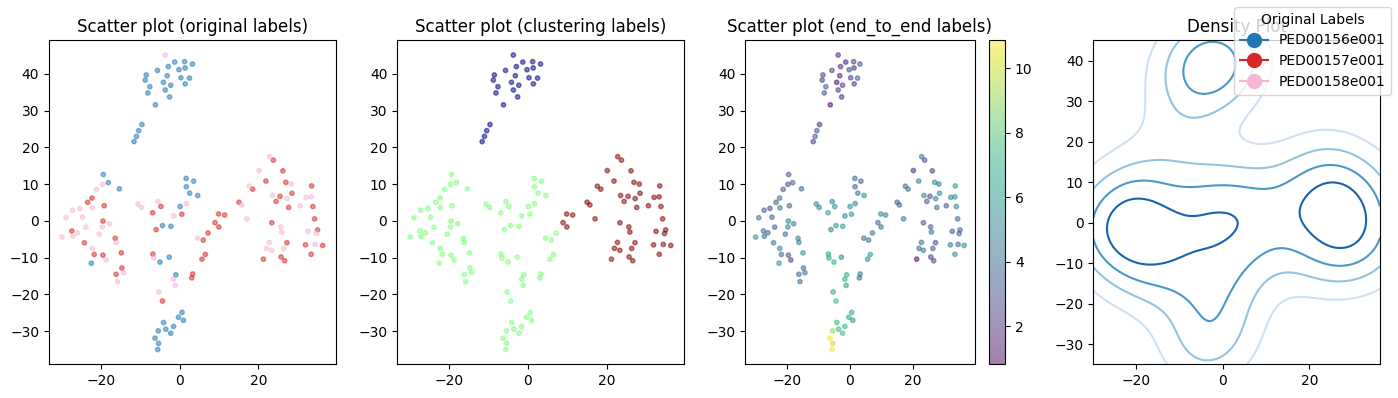

In [9]:
visualization.tsne_scatter(color_by="end_to_end", save=False)

In [10]:
visualization.generate_report()

Plots saved to C:\Users\nikol\Documents\test_dir\testington\plots\tsne.pdf


In [11]:
visualization.generate_custom_report()

Plots saved to C:\Users\nikol\Documents\test_dir\testington\plots\custom_report.pdf
